<h1>Projeto Final Curso Big Data Science</h1>

O objetivo do projeto é encontrar a relação entre a nota da redação com outras provas do ENEM e fatores socieconômicos. O objetivo é identificar como as outras competências do aluno se relacionam com a noda da redação e se tem mais ou menos importância do que fatores socioeconômicos.

<h2>Importando as bibliotecas</h2>

In [93]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
import io
import sys
import os
sns.set()

<h2>Indicação do caminho para os dados no máquina</h2>

Nessa o caminho para os arquivos com as notas do ENEM. Eles foram fragmentados para que pudesse ser processados e para evitar overfiting dos dados

In [2]:
path = "/home/marcus-fortes/semantix-big-data-science/trabalho-final/microdados_enem_2021/splited_data"

In [3]:
splited_files = os.listdir(path)

<h3>Aqui está a lista de arquivos particionados. A partir dela pode-se encontrar o pedaço do aquivo para a analise</h3>

In [4]:
splited_files

['enem_2021_05',
 'enem_2021_00',
 'enem_2021_06',
 'enem_2021_02',
 'enem_2021_04',
 'enem_2021_01',
 'enem_2021_03']

<h2>Leitura de arquivos</h2>

In [5]:
df_enem=pd.read_csv(path+"/enem_2021_00",encoding='latin-1',sep=";")

<h3>Analise exploratória</h3>

In [6]:
len(df_enem.columns)

76

In [7]:
df_enem.head(10)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210053865474,2021,5,F,1,1,1,1,3,1,...,A,A,A,B,A,A,B,A,B,B
1,210052384164,2021,12,M,1,1,1,1,11,1,...,A,A,A,B,A,A,C,A,A,A
2,210052589243,2021,13,F,3,1,1,1,15,1,...,B,A,A,B,A,A,C,B,B,B
3,210052128335,2021,3,M,1,3,1,2,0,2,...,A,A,A,B,A,A,B,A,B,B
4,210051353021,2021,2,F,1,3,1,2,0,2,...,B,A,A,B,A,B,E,A,B,B
5,210052391248,2021,10,F,1,3,1,1,9,1,...,A,A,A,A,A,A,B,A,A,B
6,210052615524,2021,9,F,0,3,1,1,6,1,...,B,A,A,B,B,A,C,A,A,B
7,210054368957,2021,4,F,1,1,1,1,1,1,...,B,A,A,C,B,A,D,B,B,B
8,210053417016,2021,8,F,1,3,1,2,0,2,...,B,A,A,B,A,A,B,A,A,B
9,210051128744,2021,4,F,1,3,1,2,0,2,...,B,A,B,C,B,A,C,A,A,B


In [8]:
df_enem.columns

Index(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
       'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
       'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH',
       'TX_GABARITO_LC', 'TX_GABARITO_MT', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004',

In [9]:
df_enem.describe(include='all')

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
count,4.999990e+05,499999.0,499999.000000,499999,499999.000000,499999.000000,499999.000000,499999.000000,499999.000000,499999.000000,...,499999,499999,499999,499999,499999,499999,499999,499999,499999,499999
unique,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,...,5,5,2,5,2,2,5,2,5,2
top,NaN,NaN,NaN,F,NaN,NaN,NaN,NaN,NaN,NaN,...,A,A,A,B,A,A,D,A,A,B
freq,NaN,NaN,NaN,345989,NaN,NaN,NaN,NaN,NaN,NaN,...,264616,488282,400702,342442,408398,402035,152796,431845,238417,447508
mean,2.100527e+11,2021.0,4.302359,NaN,1.019594,2.084700,1.028646,1.691977,1.561163,1.526285,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,9.984453e+05,0.0,3.151263,NaN,0.337483,1.018076,0.205196,0.664658,3.249127,0.601314,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2.100510e+11,2021.0,1.000000,NaN,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2.100519e+11,2021.0,2.000000,NaN,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2.100527e+11,2021.0,3.000000,NaN,1.000000,2.000000,1.000000,2.000000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2.100536e+11,2021.0,5.000000,NaN,1.000000,3.000000,1.000000,2.000000,2.000000,2.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df_enem["NU_NOTA_LC"].head(10)

0    472.6
1    498.3
2      NaN
3    638.9
4    457.6
5      NaN
6    420.4
7      NaN
8    450.7
9    494.6
Name: NU_NOTA_LC, dtype: float64

<h3>Limpeza de dados</h3>

Aqui são removidos campos que não serão usados na analise

In [11]:
data_enem = df_enem.drop(['NU_INSCRICAO','TP_SEXO','TP_ESTADO_CIVIL','TP_COR_RACA','TP_NACIONALIDADE','TP_ESCOLA','TP_ENSINO','IN_TREINEIRO','CO_MUNICIPIO_ESC','NO_MUNICIPIO_ESC','CO_UF_ESC','SG_UF_ESC','TP_DEPENDENCIA_ADM_ESC','TP_LOCALIZACAO_ESC','TP_SIT_FUNC_ESC','CO_MUNICIPIO_PROVA','NO_MUNICIPIO_PROVA','CO_UF_PROVA','SG_UF_PROVA', 'TX_RESPOSTAS_CN','TX_RESPOSTAS_CH','TX_RESPOSTAS_LC','TX_RESPOSTAS_MT','TP_LINGUA','TX_GABARITO_CN','TX_GABARITO_CH','TX_GABARITO_LC','TX_GABARITO_MT','Q001','Q002','Q003','Q004','Q005','Q006','Q007','Q008','Q009','Q010','Q011','Q012','Q013','Q014','Q015','Q016','Q017','Q018','Q019','Q020','Q021','Q022','Q023'],axis=1)

In [12]:
data_enem.isnull().sum()

NU_ANO                    0
TP_FAIXA_ETARIA           0
TP_ST_CONCLUSAO           0
TP_ANO_CONCLUIU           0
TP_PRESENCA_CN            0
TP_PRESENCA_CH            0
TP_PRESENCA_LC            0
TP_PRESENCA_MT            0
CO_PROVA_CN          118171
CO_PROVA_CH          100433
CO_PROVA_LC          100433
CO_PROVA_MT          118171
NU_NOTA_CN           118171
NU_NOTA_CH           100433
NU_NOTA_LC           100433
NU_NOTA_MT           118171
TP_STATUS_REDACAO    100433
NU_NOTA_COMP1        100433
NU_NOTA_COMP2        100433
NU_NOTA_COMP3        100433
NU_NOTA_COMP4        100433
NU_NOTA_COMP5        100433
NU_NOTA_REDACAO      100433
Q024                      0
Q025                      0
dtype: int64

In [13]:
data_enem.describe(include="all")

,NU_ANO,TP_FAIXA_ETARIA,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,...,NU_NOTA_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q024,Q025
count,499999.0,499999.000000,499999.000000,499999.000000,499999.000000,499999.000000,499999.000000,499999.000000,381828.000000,399566.000000,...,381828.000000,399566.000000,399566.000000,399566.000000,399566.000000,399566.000000,399566.000000,399566.000000,499999,499999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,B
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,238417,447508
mean,2021.0,4.302359,1.691977,1.561163,0.764590,0.801474,0.801474,0.764590,914.041348,884.817472,...,530.587857,1.111146,122.019641,143.727294,119.122798,132.886182,120.609111,638.365026,NaN,NaN
std,0.0,3.151263,0.664658,3.249127,0.425352,0.401813,0.401813,0.425352,18.654789,22.300551,...,109.428537,0.704080,33.109857,45.294685,36.068228,38.899950,59.639773,189.705068,NaN,NaN
min,2021.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,909.000000,879.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,2021.0,2.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,910.000000,880.000000,...,442.200000,1.000000,100.000000,120.000000,100.000000,120.000000,80.000000,540.000000,NaN,NaN
50%,2021.0,3.000000,2.000000,0.000000,1.000000,1.000000,1.000000,1.000000,911.000000,881.000000,...,508.500000,1.000000,120.000000,120.000000,120.000000,120.000000,120.000000,620.000000,NaN,NaN
75%,2021.0,5.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,912.000000,882.000000,...,605.600000,1.000000,140.000000,180.000000,140.000000,160.000000,160.000000,780.000000,NaN,NaN


In [14]:
data_enem_mv = data_enem.dropna(axis=0)

In [15]:
data_enem_mv.describe()

,NU_ANO,TP_FAIXA_ETARIA,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,...,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
count,380790.0,380790.000000,380790.000000,380790.000000,380790.0,380790.0,380790.0,380790.0,380790.000000,380790.000000,...,380790.000000,380790.000000,380790.000000,380790.000000,380790.000000,380790.000000,380790.000000,380790.000000,380790.000000,380790.000000
mean,2021.0,3.899280,1.742948,1.317753,1.0,1.0,1.0,1.0,914.041015,884.664999,...,522.149185,503.487730,530.694522,1.090457,123.218729,145.405026,120.484204,134.405525,122.711731,646.225216
std,0.0,2.857164,0.666340,2.938319,0.0,0.0,0.0,0.0,18.654102,21.915203,...,93.202955,77.483682,109.429434,0.642306,31.920337,44.168762,35.070781,37.771596,58.805394,184.024244
min,2021.0,1.000000,1.000000,0.000000,1.0,1.0,1.0,1.0,909.000000,879.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2021.0,2.000000,1.000000,0.000000,1.0,1.0,1.0,1.0,910.000000,880.000000,...,449.200000,449.500000,442.300000,1.000000,100.000000,120.000000,100.000000,120.000000,80.000000,540.000000
50%,2021.0,3.000000,2.000000,0.000000,1.0,1.0,1.0,1.0,911.000000,881.000000,...,522.900000,505.600000,508.600000,1.000000,120.000000,120.000000,120.000000,120.000000,120.000000,640.000000
75%,2021.0,4.000000,2.000000,1.000000,1.0,1.0,1.0,1.0,912.000000,882.000000,...,589.075000,557.900000,605.700000,1.000000,140.000000,180.000000,140.000000,160.000000,160.000000,780.000000
max,2021.0,20.000000,4.000000,15.000000,1.0,1.0,1.0,1.0,1014.000000,1002.000000,...,846.900000,813.200000,953.100000,9.000000,200.000000,200.000000,200.000000,200.000000,200.000000,1000.000000


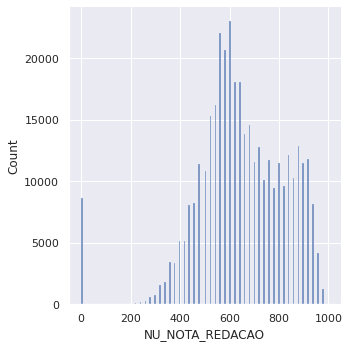

In [16]:
sns.displot(data_enem_mv['NU_NOTA_REDACAO'])

In [17]:
redacao_maior_0=data_enem_mv[data_enem_mv['NU_NOTA_REDACAO']>0]

Os  registros com nota igual a 0 foram eliminados para não impactarem na analise. Normalmente são alunos que não compareceram ao exame

In [18]:
redacao_maior_0.describe()

,NU_ANO,TP_FAIXA_ETARIA,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,...,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
count,372119.0,372119.000000,372119.000000,372119.000000,372119.0,372119.0,372119.0,372119.0,372119.000000,372119.000000,...,372119.000000,372119.000000,372119.000000,372119.0,372119.000000,372119.000000,372119.000000,372119.000000,372119.000000,372119.000000
mean,2021.0,3.898954,1.737804,1.330620,1.0,1.0,1.0,1.0,914.045824,884.670764,...,523.996186,505.179039,532.365420,1.0,126.089934,148.793209,123.291689,137.537401,125.571121,661.283353
std,0.0,2.850263,0.665740,2.946153,0.0,0.0,0.0,0.0,18.666288,21.928449,...,92.559584,76.675004,109.594576,0.0,26.088683,38.628987,30.207274,32.080941,56.387904,157.150604
min,2021.0,1.000000,1.000000,0.000000,1.0,1.0,1.0,1.0,909.000000,879.000000,...,0.000000,0.000000,0.000000,1.0,0.000000,40.000000,0.000000,0.000000,0.000000,40.000000
25%,2021.0,2.000000,1.000000,0.000000,1.0,1.0,1.0,1.0,910.000000,880.000000,...,451.600000,451.800000,443.600000,1.0,120.000000,120.000000,100.000000,120.000000,100.000000,560.000000
50%,2021.0,3.000000,2.000000,0.000000,1.0,1.0,1.0,1.0,911.000000,881.000000,...,525.200000,507.200000,510.800000,1.0,120.000000,120.000000,120.000000,120.000000,120.000000,640.000000
75%,2021.0,4.000000,2.000000,1.000000,1.0,1.0,1.0,1.0,912.000000,882.000000,...,590.400000,559.000000,607.900000,1.0,140.000000,200.000000,140.000000,160.000000,160.000000,800.000000
max,2021.0,20.000000,4.000000,15.000000,1.0,1.0,1.0,1.0,1014.000000,1002.000000,...,846.900000,813.200000,953.100000,1.0,200.000000,200.000000,200.000000,200.000000,200.000000,1000.000000


/home/marcus-fortes/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='NU_NOTA_REDACAO', ylabel='Density'>

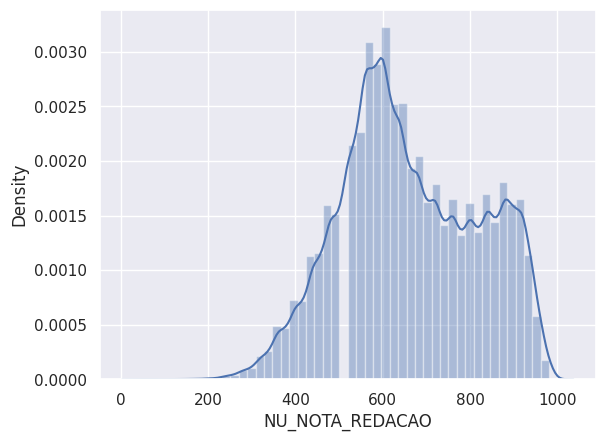

In [19]:
sns.distplot(redacao_maior_0['NU_NOTA_REDACAO'])

In [20]:
redacao_maior_0['NU_NOTA_REDACAO'].describe()

count    372119.000000
mean        661.283353
std         157.150604
min          40.000000
25%         560.000000
50%         640.000000
75%         800.000000
max        1000.000000
Name: NU_NOTA_REDACAO, dtype: float64

Observando os valores das notas da redação, vemos que há uma disparidade muito grande com relação à nota mais baixa, a nota no primeiro quartil e a média. A menor nota é muito menor que o primeiro quartil(12x menor) e 17x menor do que a média.) Dessa forma vamos eliminar as notas inferiores a 450. 
O governo já estabeleceu que a nota mímina na redação para ingressar no FIES, a partir de 2022, será 450, inclusive para participção em alguns programas de bolsas de estudo usam essa referência. Então o parâmetro é suficiente para manter notas que atestam minimamente uma boa capacidade de fazer a redação.
Portal do Mec abordando notas
http://portal.mec.gov.br/component/content/article?id=84461
Notícia a respeito do critério mínimo de 450 para a nota da redação
https://fdr.com.br/2020/10/14/veja-nota-minima-da-redacao-do-enem-exigida-para-inscricao-no-fies/
Abaixo seguem as notas mínimas registradas nas provas. Fonte Brasil Escola (Uol)
https://vestibular.brasilescola.uol.com.br/enem/enem-2021-veja-as-medias-e-notas-maximas-e-minimas/352322.html

<table style="width:600px" cellspacing="1" cellpadding="1" border="2" align="center">
	<tbody>
		<tr>
			<td style="background-color:#66ff00; text-align:center"><strong>Provas</strong></td>
			<td style="background-color:#66ff00; text-align:center"><strong>Proficiência<br>
			média</strong></td>
			<td style="background-color:#66ff00; text-align:center"><strong>Nota mínima</strong></td>
			<td style="background-color:#66ff00; text-align:center"><strong>Nota máxima</strong></td>
		</tr>
		<tr>
			<td style="text-align:center">Linguagens</td>
			<td style="text-align:center">501,83</td>
			<td style="text-align:center">295,2</td>
			<td style="text-align:center">826,1</td>
		</tr>
		<tr>
			<td style="background-color:#dddddd; text-align:center">Ciências Humanas</td>
			<td style="background-color:#dddddd; text-align:center">519,61</td>
			<td style="background-color:#dddddd; text-align:center">311,6</td>
			<td style="background-color:#dddddd; text-align:center">846,9</td>
		</tr>
		<tr>
			<td style="text-align:center">Ciências da Natureza</td>
			<td style="text-align:center">491,05</td>
			<td style="text-align:center">307,6</td>
			<td style="text-align:center">867,1</td>
		</tr>
		<tr>
			<td style="background-color:#dddddd; text-align:center">Matemática</td>
			<td style="background-color:#dddddd; text-align:center">533,72</td>
			<td style="background-color:#dddddd; text-align:center">310,4</td>
			<td style="background-color:#dddddd; text-align:center">953,1</td>
		</tr>
	</tbody>
</table>

In [21]:
#q  = redacao_maior_0['NU_NOTA_REDACAO'].quantile(0.0025)
data_redacao = redacao_maior_0[redacao_maior_0['NU_NOTA_REDACAO']>450]
data_redacao.describe(include='all')

,NU_ANO,TP_FAIXA_ETARIA,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,...,NU_NOTA_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q024,Q025
count,341353.0,341353.000000,341353.000000,341353.000000,341353.0,341353.0,341353.0,341353.0,341353.000000,341353.000000,...,341353.000000,341353.0,341353.000000,341353.000000,341353.000000,341353.000000,341353.000000,341353.000000,341353,341353
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,B
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,141977,313187
mean,2021.0,3.849581,1.731671,1.336306,1.0,1.0,1.0,1.0,914.006307,884.622836,...,539.096932,1.0,128.972471,153.328900,127.442559,141.023808,134.941190,685.708929,NaN,NaN
std,0.0,2.782529,0.665935,2.917025,0.0,0.0,0.0,0.0,18.564272,21.804796,...,110.226518,0.0,24.426086,35.923702,27.277351,30.593194,48.370511,139.564433,NaN,NaN
min,2021.0,1.000000,1.000000,0.000000,1.0,1.0,1.0,1.0,909.000000,879.000000,...,0.000000,1.0,40.000000,40.000000,40.000000,40.000000,0.000000,460.000000,NaN,NaN
25%,2021.0,2.000000,1.000000,0.000000,1.0,1.0,1.0,1.0,910.000000,880.000000,...,449.200000,1.0,120.000000,120.000000,120.000000,120.000000,100.000000,580.000000,NaN,NaN
50%,2021.0,3.000000,2.000000,0.000000,1.0,1.0,1.0,1.0,911.000000,881.000000,...,519.800000,1.0,120.000000,140.000000,120.000000,140.000000,140.000000,660.000000,NaN,NaN
75%,2021.0,4.000000,2.000000,1.000000,1.0,1.0,1.0,1.0,912.000000,882.000000,...,616.400000,1.0,140.000000,200.000000,140.000000,160.000000,180.000000,800.000000,NaN,NaN


In [22]:
data_redacao['NU_NOTA_REDACAO'].mean()

685.7089288800743

In [23]:
from scipy.stats import chi2

/home/marcus-fortes/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='NU_NOTA_REDACAO', ylabel='Density'>

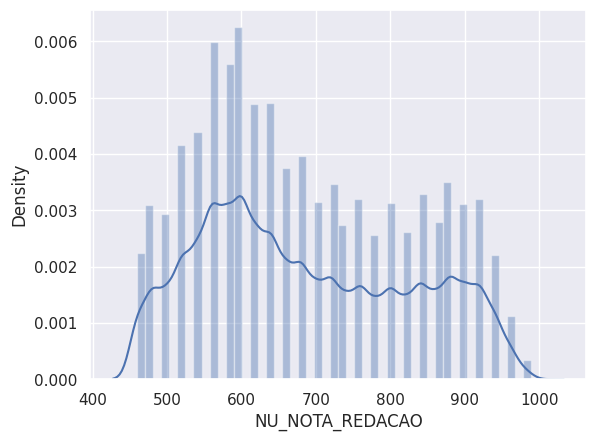

In [24]:
sns.distplot(data_redacao['NU_NOTA_REDACAO'])

In [25]:
#data_redacao_old = data_redacao.copy()
#data_redacao = data_redacao[(data_redacao['NU_NOTA_REDACAO']>490)&(data_redacao['NU_NOTA_REDACAO']<800)]
#sns.distplot(data_redacao['NU_NOTA_REDACAO'])

In [26]:
data_redacao['NU_NOTA_REDACAO'].mean()

685.7089288800743

In [27]:
data_redacao_1=data_redacao[(data_redacao['NU_NOTA_REDACAO']>=450)&(data_redacao['NU_NOTA_REDACAO']<=750)]

In [28]:
data_redacao_1['NU_NOTA_REDACAO'].mean()

600.3657799940918

In [84]:
data_redacao_1['NU_NOTA_REDACAO'].describe()

count    226803.000000
mean        600.365780
std          76.057961
min         460.000000
25%         540.000000
50%         600.000000
75%         660.000000
max         740.000000
Name: NU_NOTA_REDACAO, dtype: float64

/home/marcus-fortes/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='NU_NOTA_REDACAO', ylabel='Density'>

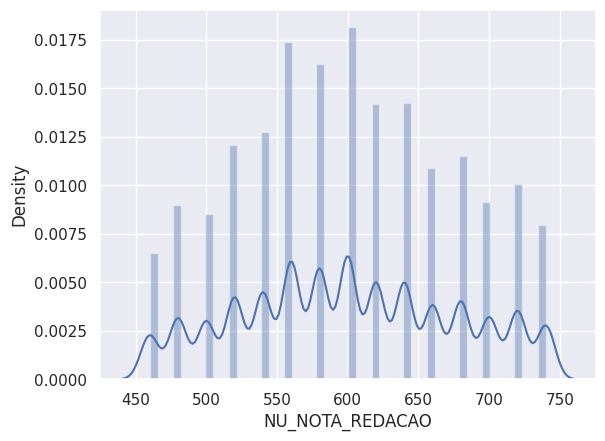

In [30]:
sns.distplot(data_redacao_1['NU_NOTA_REDACAO'])

In [31]:
data_redacao_2=data_redacao[(data_redacao['NU_NOTA_REDACAO']>750)&(data_redacao['NU_NOTA_REDACAO']<=1000)]

In [32]:
data_redacao_2['NU_NOTA_REDACAO'].describe()

count    114550.000000
mean        854.683893
std          60.141483
min         760.000000
25%         800.000000
50%         860.000000
75%         900.000000
max        1000.000000
Name: NU_NOTA_REDACAO, dtype: float64

In [83]:
data_redacao_2['NU_NOTA_REDACAO'].mean()

854.6838934962898

/home/marcus-fortes/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='NU_NOTA_REDACAO', ylabel='Density'>

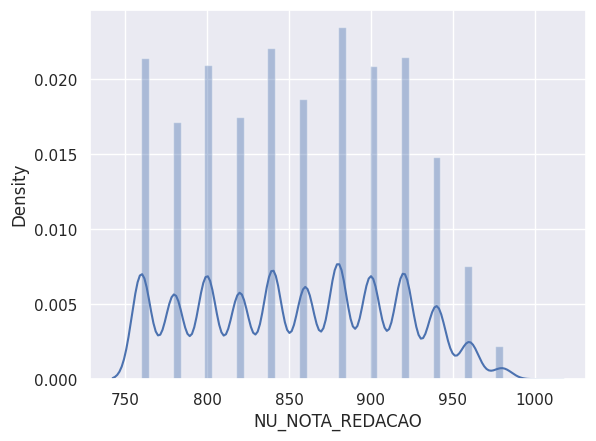

In [33]:
sns.distplot(data_redacao_2['NU_NOTA_REDACAO'])

/home/marcus-fortes/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='NU_NOTA_REDACAO', ylabel='Density'>

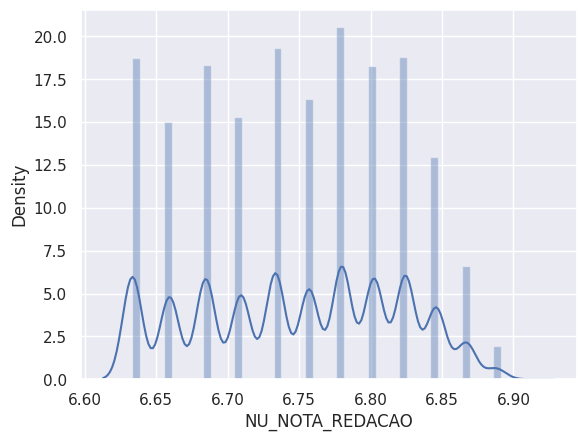

In [34]:
sns.distplot(np.log(data_redacao_2['NU_NOTA_REDACAO']))

In [35]:
data_redacao_1["NU_NOTA_REDACAO"].describe()

count    226803.000000
mean        600.365780
std          76.057961
min         460.000000
25%         540.000000
50%         600.000000
75%         660.000000
max         740.000000
Name: NU_NOTA_REDACAO, dtype: float64

<AxesSubplot:xlabel='NU_NOTA_REDACAO', ylabel='Count'>

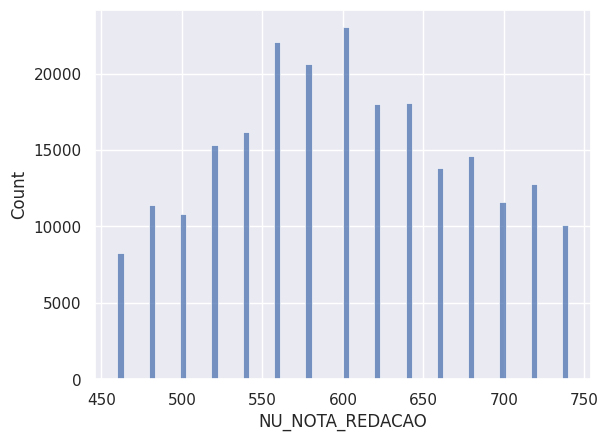

In [36]:
sns.histplot(data_redacao_1['NU_NOTA_REDACAO'])

<h3>Analisando as notas de matemática</h3>

/home/marcus-fortes/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='NU_NOTA_MT', ylabel='Density'>

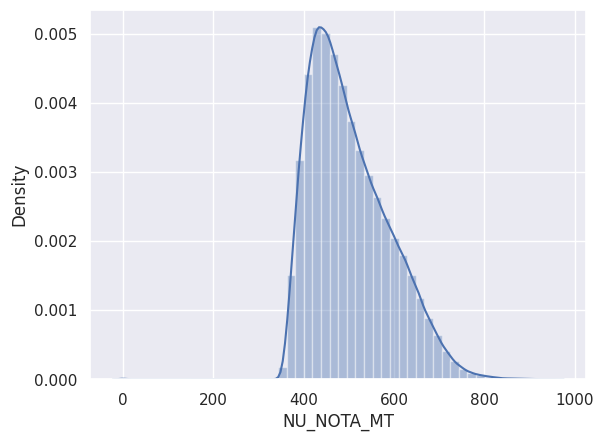

In [37]:
sns.distplot(data_redacao_1['NU_NOTA_MT'])

In [38]:
data_redacao_1['NU_NOTA_MT'].describe()

count    226803.000000
mean        502.603097
std          87.691827
min           0.000000
25%         433.800000
50%         485.800000
75%         559.700000
max         953.100000
Name: NU_NOTA_MT, dtype: float64

Vemos que temos algumas notas 0. Vamos também remover essas notas muito baixas

In [85]:
data_redacao[data_redacao['NU_NOTA_MT']<310.4].describe()

,NU_ANO,TP_FAIXA_ETARIA,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,...,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
count,40.0,40.000000,40.000000,40.000000,40.0,40.0,40.0,40.0,40.000000,40.000000,...,40.00000,40.00000,40.0,40.0,40.000000,40.000000,40.000000,40.000000,40.000000,40.00000
mean,2021.0,4.550000,1.625000,1.100000,1.0,1.0,1.0,1.0,935.950000,910.300000,...,522.40750,521.38250,0.0,1.0,122.500000,147.000000,125.500000,137.000000,119.000000,651.00000
std,0.0,3.782212,0.627878,2.880527,0.0,0.0,0.0,0.0,45.005384,52.574831,...,175.55218,85.13887,0.0,0.0,24.468714,37.498718,28.640119,30.229888,53.002177,140.83633
min,2021.0,1.000000,1.000000,0.000000,1.0,1.0,1.0,1.0,909.000000,879.000000,...,0.00000,366.30000,0.0,1.0,80.000000,80.000000,80.000000,100.000000,0.000000,460.00000
25%,2021.0,2.000000,1.000000,0.000000,1.0,1.0,1.0,1.0,910.000000,880.000000,...,466.52500,454.07500,0.0,1.0,100.000000,120.000000,120.000000,120.000000,80.000000,540.00000
50%,2021.0,3.000000,2.000000,0.000000,1.0,1.0,1.0,1.0,911.000000,881.000000,...,559.35000,525.35000,0.0,1.0,120.000000,120.000000,120.000000,120.000000,120.000000,610.00000
75%,2021.0,4.000000,2.000000,1.000000,1.0,1.0,1.0,1.0,936.750000,911.250000,...,629.65000,590.02500,0.0,1.0,140.000000,185.000000,140.000000,160.000000,160.000000,745.00000
max,2021.0,15.000000,3.000000,15.000000,1.0,1.0,1.0,1.0,1014.000000,1002.000000,...,741.00000,705.90000,0.0,1.0,180.000000,200.000000,200.000000,200.000000,200.000000,960.00000


O Inep considerou que a nota mínima que demonstra proficiêcia em matemática é 310.4. Vamos então eliminar os registros inferiores à proficiência mínima para que eles não interfiram nos resutados https://vestibular.brasilescola.uol.com.br/enem/enem-2021-veja-as-medias-e-notas-maximas-e-minimas/352322.html

In [40]:
data_redacao_matematica = data_redacao[data_redacao['NU_NOTA_MT']>310.4]

In [41]:
data_redacao_matematica.describe(include="all")

,NU_ANO,TP_FAIXA_ETARIA,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,...,NU_NOTA_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q024,Q025
count,341313.0,341313.000000,341313.000000,341313.000000,341313.0,341313.0,341313.0,341313.0,341313.000000,341313.000000,...,341313.000000,341313.0,341313.000000,341313.000000,341313.000000,341313.000000,341313.000000,341313.000000,341313,341313
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,B
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,141961,313153
mean,2021.0,3.849499,1.731683,1.336334,1.0,1.0,1.0,1.0,914.003736,884.619827,...,539.160111,1.0,128.973230,153.329642,127.442787,141.024280,134.943058,685.712997,NaN,NaN
std,0.0,2.782388,0.665940,2.917032,0.0,0.0,0.0,0.0,18.557605,21.797058,...,110.078360,0.0,24.426016,35.923505,27.277223,30.593249,48.369720,139.563985,NaN,NaN
min,2021.0,1.000000,1.000000,0.000000,1.0,1.0,1.0,1.0,909.000000,879.000000,...,314.400000,1.0,40.000000,40.000000,40.000000,40.000000,0.000000,460.000000,NaN,NaN
25%,2021.0,2.000000,1.000000,0.000000,1.0,1.0,1.0,1.0,910.000000,880.000000,...,449.300000,1.0,120.000000,120.000000,120.000000,120.000000,100.000000,580.000000,NaN,NaN
50%,2021.0,3.000000,2.000000,0.000000,1.0,1.0,1.0,1.0,911.000000,881.000000,...,519.800000,1.0,120.000000,140.000000,120.000000,140.000000,140.000000,660.000000,NaN,NaN
75%,2021.0,4.000000,2.000000,1.000000,1.0,1.0,1.0,1.0,912.000000,882.000000,...,616.500000,1.0,140.000000,200.000000,140.000000,160.000000,180.000000,800.000000,NaN,NaN


In [42]:
data_redacao_matematica['NU_NOTA_MT'].describe()

count    341313.000000
mean        539.160111
std         110.078360
min         314.400000
25%         449.300000
50%         519.800000
75%         616.500000
max         953.100000
Name: NU_NOTA_MT, dtype: float64

/home/marcus-fortes/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='NU_NOTA_MT', ylabel='Density'>

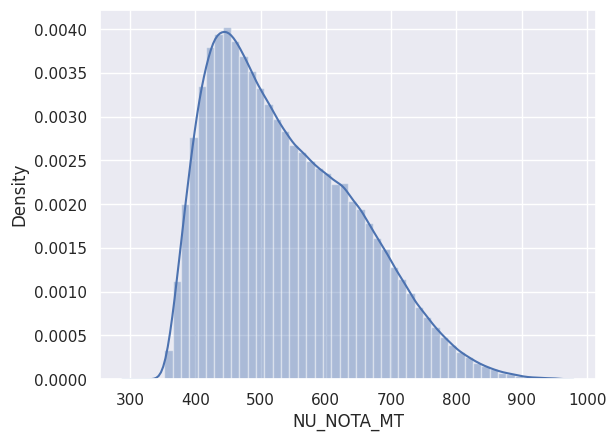

In [43]:
sns.distplot(data_redacao_matematica['NU_NOTA_MT'])

Agora o tratamento para a prova de Linguagens e códigos

In [44]:
data_redacao_matematica['NU_NOTA_LC'].describe()

count    341313.000000
mean        511.738459
std          74.345600
min           0.000000
25%         461.100000
50%         513.700000
75%         563.400000
max         813.200000
Name: NU_NOTA_LC, dtype: float64

/home/marcus-fortes/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='NU_NOTA_LC', ylabel='Density'>

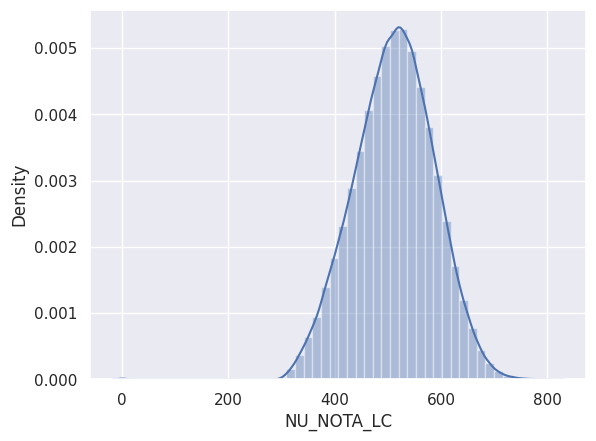

In [45]:
sns.distplot(data_redacao_matematica['NU_NOTA_LC'])

In [46]:
data_redacao_mt_lc=data_redacao_matematica[data_redacao_matematica['NU_NOTA_LC']>295.2]

/home/marcus-fortes/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='NU_NOTA_LC', ylabel='Density'>

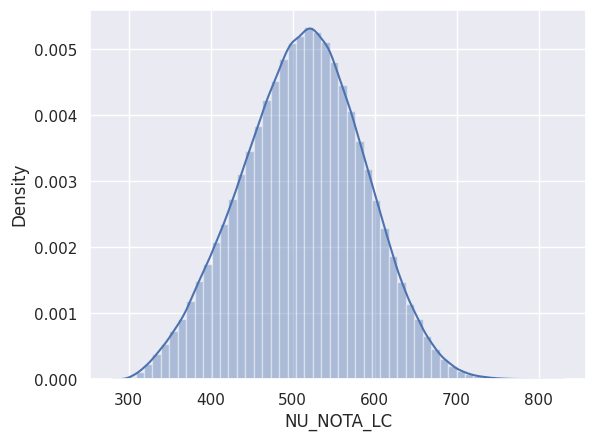

In [47]:
sns.distplot(data_redacao_mt_lc['NU_NOTA_LC'])

Tratamento das notas de ciências humanas

In [48]:
data_redacao_mt_lc['NU_NOTA_CH'].describe()

count    341267.000000
mean        530.829851
std          91.236952
min           0.000000
25%         460.900000
50%         533.700000
75%         595.700000
max         846.900000
Name: NU_NOTA_CH, dtype: float64

/home/marcus-fortes/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='NU_NOTA_CH', ylabel='Density'>

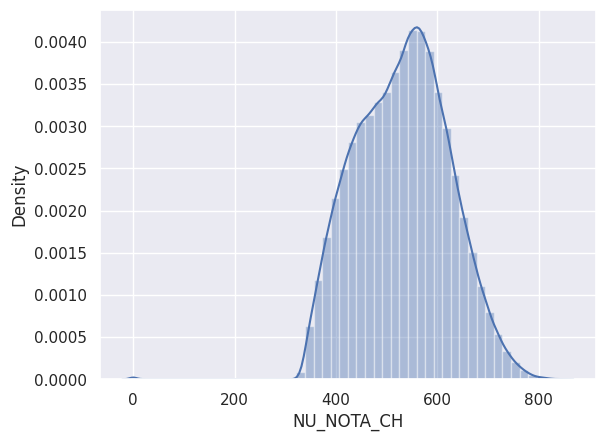

In [49]:
sns.distplot(data_redacao_mt_lc['NU_NOTA_CH'])

In [50]:
data_redacao_mt_lc_ch=data_redacao_mt_lc[data_redacao_mt_lc['NU_NOTA_CH']>311.6]

/home/marcus-fortes/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='NU_NOTA_CH', ylabel='Density'>

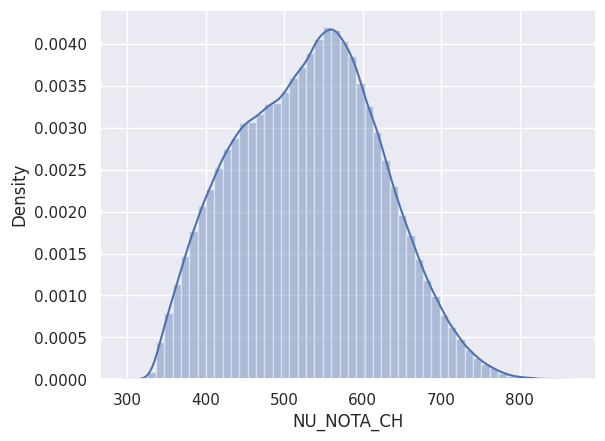

In [51]:
sns.distplot(data_redacao_mt_lc_ch['NU_NOTA_CH'])

Tratamento das notas de ciências da natureza

In [52]:
data_redacao_mt_lc_ch['NU_NOTA_CN'].describe()

count    341143.000000
mean        493.812546
std          80.339832
min           0.000000
25%         433.700000
50%         482.800000
75%         546.200000
max         867.100000
Name: NU_NOTA_CN, dtype: float64

/home/marcus-fortes/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='NU_NOTA_CN', ylabel='Density'>

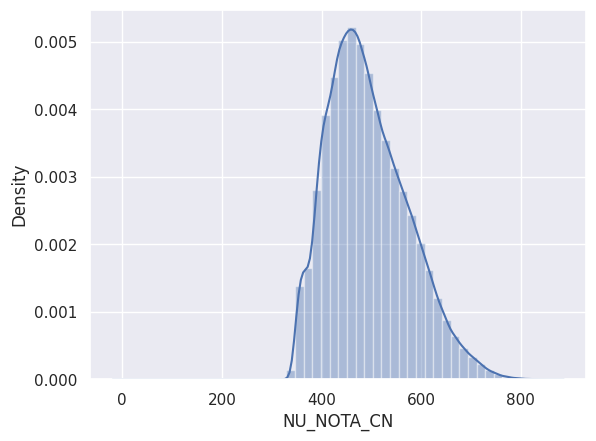

In [53]:
sns.distplot(data_redacao_mt_lc_ch['NU_NOTA_CN'])

In [54]:
data_redacao_mt_lc_ch_cn=data_redacao_mt_lc_ch[data_redacao_mt_lc_ch['NU_NOTA_CN']>307.6]

/home/marcus-fortes/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='NU_NOTA_CN', ylabel='Density'>

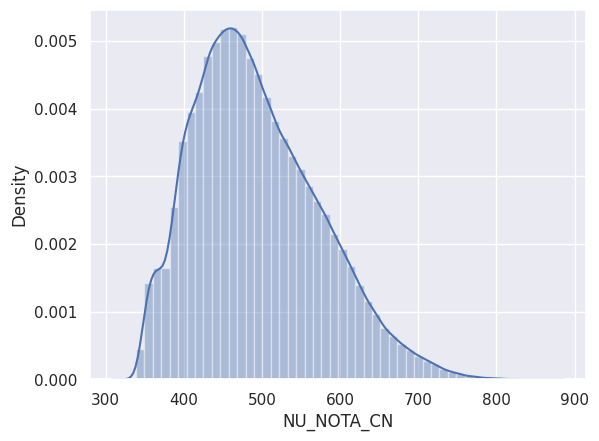

In [55]:
sns.distplot(data_redacao_mt_lc_ch_cn['NU_NOTA_CN'])

In [56]:
data_redacao_mt_lc_ch_cn_final= data_redacao_mt_lc_ch_cn.reset_index(drop=True)

In [57]:
data_redacao_mt_lc_ch_cn_final.describe()

,NU_ANO,TP_FAIXA_ETARIA,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,...,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
count,341141.0,341141.000000,341141.000000,341141.000000,341141.0,341141.0,341141.0,341141.0,341141.000000,341141.000000,...,341141.000000,341141.000000,341141.000000,341141.0,341141.000000,341141.000000,341141.000000,341141.000000,341141.000000,341141.000000
mean,2021.0,3.849570,1.731571,1.336371,1.0,1.0,1.0,1.0,914.000715,884.616253,...,531.021925,511.824895,539.174685,1.0,128.975995,153.336538,127.446129,141.028021,134.953875,685.740559
std,0.0,2.782198,0.665900,2.916850,0.0,0.0,0.0,0.0,18.549886,21.788013,...,90.689923,74.104706,110.079051,0.0,24.425892,35.921897,27.279121,30.594349,48.366280,139.565764
min,2021.0,1.000000,1.000000,0.000000,1.0,1.0,1.0,1.0,909.000000,879.000000,...,314.900000,298.000000,314.400000,1.0,40.000000,40.000000,40.000000,40.000000,0.000000,460.000000
25%,2021.0,2.000000,1.000000,0.000000,1.0,1.0,1.0,1.0,910.000000,880.000000,...,461.000000,461.100000,449.300000,1.0,120.000000,120.000000,120.000000,120.000000,100.000000,580.000000
50%,2021.0,3.000000,2.000000,0.000000,1.0,1.0,1.0,1.0,911.000000,881.000000,...,533.700000,513.700000,519.800000,1.0,120.000000,140.000000,120.000000,140.000000,140.000000,660.000000
75%,2021.0,4.000000,2.000000,1.000000,1.0,1.0,1.0,1.0,912.000000,882.000000,...,595.800000,563.400000,616.500000,1.0,140.000000,200.000000,140.000000,160.000000,180.000000,800.000000
max,2021.0,20.000000,4.000000,15.000000,1.0,1.0,1.0,1.0,1014.000000,1002.000000,...,846.900000,813.200000,953.100000,1.0,200.000000,200.000000,200.000000,200.000000,200.000000,1000.000000


Foram removido 2904 registros que eram problemáticos: notas muito abaixo, registros inválidos, alunos faltantes. O que se espera é que os mais representativos sejam aproveitados para a analise

In [58]:
data_redacao_mt_lc_ch_cn_final[["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_LC","NU_NOTA_MT","NU_NOTA_REDACAO"]]

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,505.9,551.8,498.3,461.5,560.0
1,580.7,678.9,638.9,659.5,780.0
2,497.7,532.4,457.6,582.6,780.0
3,487.4,476.5,450.7,493.4,520.0
4,650.9,617.9,631.7,796.7,980.0
...,...,...,...,...,...
341136,603.5,792.0,693.8,801.2,660.0
341137,542.1,619.1,600.9,594.6,780.0
341138,472.0,578.4,558.3,613.6,900.0
341139,644.8,660.8,658.5,705.7,900.0


In [193]:
notas_analise_1=data_redacao_mt_lc_ch_cn_final[["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_LC","NU_NOTA_MT","NU_NOTA_REDACAO"]]

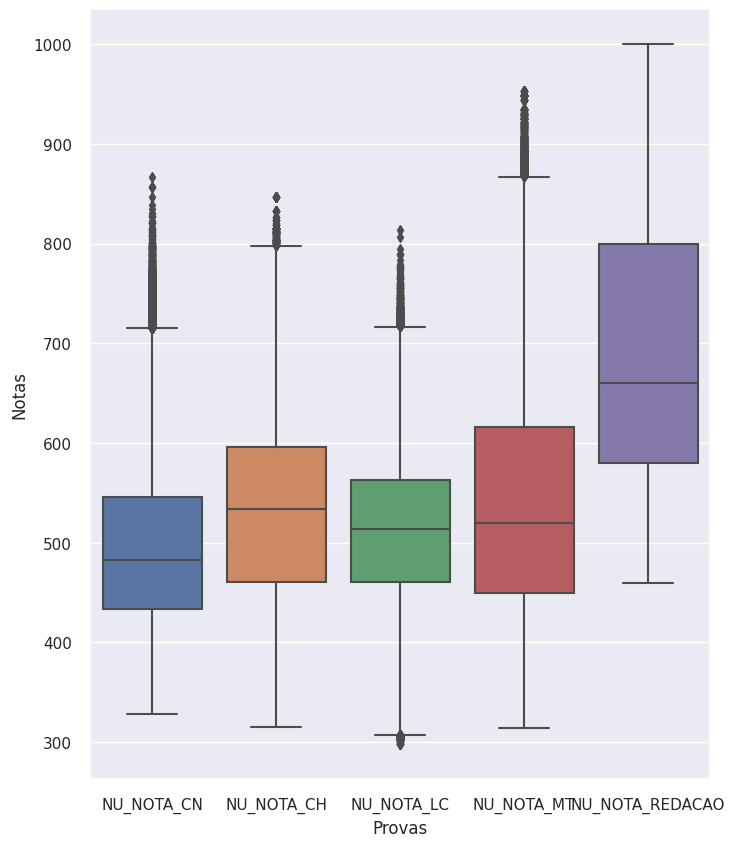

In [212]:
sns.boxplot(x="variable", y="value", data=pd.melt(notas_analise_1))
sns.set(rc={"figure.figsize":(8, 10)}) 
plt.xlabel("Provas")
plt.ylabel("Notas")

plt.show()

In [213]:
notas_analise_1["NU_NOTA_REDACAO"].describe()

count    341141.000000
mean        685.740559
std         139.565764
min         460.000000
25%         580.000000
50%         660.000000
75%         800.000000
max        1000.000000
Name: NU_NOTA_REDACAO, dtype: float64

In [214]:
notas_analise_1.head(20)

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,505.9,551.8,498.3,461.5,560.0
1,580.7,678.9,638.9,659.5,780.0
2,497.7,532.4,457.6,582.6,780.0
3,487.4,476.5,450.7,493.4,520.0
4,650.9,617.9,631.7,796.7,980.0
5,378.5,502.7,487.7,514.9,680.0
6,537.6,476.5,553.2,509.7,560.0
7,462.2,402.2,403.3,445.8,540.0
8,487.9,419.9,488.2,553.1,720.0
9,516.3,524.3,496.3,608.5,880.0


In [215]:
from sklearn.linear_model import LinearRegression
# Warning 
from yellowbrick.regressor import ResidualsPlot 

In [216]:
import statsmodels.formula.api as sm

In [217]:
notas_analise_1.shape

(341141, 5)

In [218]:
notas_analise_1.head(10)

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,505.9,551.8,498.3,461.5,560.0
1,580.7,678.9,638.9,659.5,780.0
2,497.7,532.4,457.6,582.6,780.0
3,487.4,476.5,450.7,493.4,520.0
4,650.9,617.9,631.7,796.7,980.0
5,378.5,502.7,487.7,514.9,680.0
6,537.6,476.5,553.2,509.7,560.0
7,462.2,402.2,403.3,445.8,540.0
8,487.9,419.9,488.2,553.1,720.0
9,516.3,524.3,496.3,608.5,880.0


In [253]:
modelo_ajustado = sm.ols(formula = 'NU_NOTA_REDACAO ~ NU_NOTA_LC + NU_NOTA_CN + NU_NOTA_CH + NU_NOTA_MT', data = notas_analise_1)
modelo_treinado = modelo_ajustado.fit()
modelo_treinado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        NU_NOTA_REDACAO   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                 4.848e+04
Date:                Sun, 18 Dec 2022   Prob (F-statistic):               0.00
Time:                        21:40:30   Log-Likelihood:            -2.0920e+06
No. Observations:              341141   AIC:                         4.184e+06
Df Residuals:                  341136   BIC:                         4.184e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    126.8892      1.390     91.287      0.000     124.165     129.614
NU_NOTA_LC     0.2951      0.004     69.598      0.000       0.287       0.303
NU_NOTA_CN     0.2203      0.004     59.341      0.000       0.213       0.228
NU_NOTA_CH     0.2391      0.004     67.484      0.000       0.232       0.246
NU_NOTA_MT     0.3191      0.003    125.232      0.000       0.314       0.324
==============================================================================
Omnibus:                     5639.716   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5412.551
Skew:                           0.276   Prob(JB):                         0.00
Kurtosis:                       2.725   Cond. No.                     7.65e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.65e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [220]:
x_mod_2 = notas_analise_1[["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_LC","NU_NOTA_LC"]].values

In [221]:
y_red = notas_analise_1["NU_NOTA_REDACAO"]

In [246]:
modelo_final = LinearRegression()
modelo_final.fit(x_mod_2,y_red)
modelo_final.score(x_mod_2,y_red)

0.33312619437419777

In [223]:
data_2 = pd.read_csv("../microdados_enem_2021/splited_data/enem_2021_01",encoding='latin-1',sep=";")

In [224]:
len(data_2.columns)

76

In [225]:
data_2.columns=['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
       'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
       'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH',
       'TX_GABARITO_LC', 'TX_GABARITO_MT', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004',
       'Q005', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013',
       'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022',
       'Q023', 'Q024', 'Q025']

In [247]:
data_2_sample = data_2.iloc[[231121,1521,2211,6031]]

In [248]:
data_2_sample[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT','NU_NOTA_REDACAO']]

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
231121,472.7,540.0,527.8,444.5,500.0
1521,370.0,383.9,392.8,534.0,560.0
2211,465.2,468.7,513.9,445.7,580.0
6031,433.9,483.7,527.7,536.3,680.0


In [249]:
novo = np.array([472.7,540.0,527.8,444.5])
novo = novo.reshape(1,-1)
modelo_final.predict(novo)

array([670.07904036])